# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('compresive_strength_concrete.csv')

In [3]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
data.shape

(1030, 9)

In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
train_data = data.sample(frac = 0.7, random_state = 123)
test_data = data.drop(train_data.index)

In [8]:
train_data.shape

(721, 9)

In [9]:
test_data.shape

(309, 9)

In [10]:
train_labels = train_data.iloc[:,-1]
train_data = train_data.iloc[:,0:-1]

In [11]:
train_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28


In [12]:
train_data.shape

(721, 8)

In [13]:
train_labels.head()

134    71.30
13     42.33
996    26.86
770    14.99
937    36.80
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [14]:
train_labels.shape

(721,)

In [15]:
test_labels = test_data.iloc[:,-1]
test_data = test_data.iloc[:,0:-1]

In [17]:
test_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28


In [18]:
test_data.shape

(309, 8)

In [19]:
test_labels.head()

2     40.27
3     41.05
8     45.85
10    38.07
14    47.81
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [20]:
test_labels.shape

(309,)

In [21]:
data_mean = train_data.mean()
train_data -= data_mean

data_std = train_data.std()
train_data /= data_std

In [22]:
train_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
134,0.805454,1.303810,-0.82806,-0.788615,0.922719,-0.348682,-0.241282,-0.282950
13,-0.859113,1.315264,-0.82806,2.191863,-1.034088,-0.513035,-1.299946,0.700674
996,-1.219802,1.873117,-0.82806,0.869306,0.028661,0.390257,-1.128438,-0.282950
770,0.674295,-0.861162,-0.82806,0.491432,-1.034088,0.975198,0.378124,-0.679572
937,0.330001,-0.861162,0.91644,-0.146229,0.315434,0.391552,-1.069212,-0.282950


In [23]:
test_data -= data_mean
test_data /= data_std

In [24]:
test_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
2,0.515168,0.771158,-0.82806,2.191863,-1.034088,-0.513035,-2.237691,3.556357
3,0.515168,0.771158,-0.82806,2.191863,-1.034088,-0.513035,-2.237691,5.063523
8,-0.126164,0.444694,-0.82806,2.191863,-1.034088,-0.513035,-1.299946,-0.282950
10,-0.776174,0.655464,-0.82806,0.491432,-1.034088,0.087434,0.618729,0.700674
14,0.240311,0.009409,-0.82806,2.191863,-1.034088,-0.513035,-1.299946,-0.282950


In [25]:
labels_mean = train_labels.mean()
train_labels -= labels_mean

labels_std = train_labels.std()
train_labels /= labels_std

In [26]:
train_labels.head()

134    2.109944
13     0.392249
996   -0.525002
770   -1.228800
937    0.064363
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [27]:
test_labels -= labels_mean
test_labels /= labels_std

In [28]:
test_labels

2       0.270107
3       0.316355
8       0.600957
10      0.139664
14      0.717170
          ...   
1018    0.092230
1019   -0.028726
1023    0.222080
1024    0.130770
1029   -0.196523
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

In [72]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
  
  

In [73]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [74]:
history = model.fit(train_data,train_labels,epochs=150,validation_split=0.3)

Epoch 1/150
16/16 [==============================] - 1s 17ms/step - loss: 0.7201 - mae: 0.6832 - val_loss: 0.5676 - val_mae: 0.6162
Epoch 2/150
16/16 [==============================] - 0s 5ms/step - loss: 0.4335 - mae: 0.5350 - val_loss: 0.4307 - val_mae: 0.5360
Epoch 3/150
16/16 [==============================] - 0s 5ms/step - loss: 0.3430 - mae: 0.4824 - val_loss: 0.3754 - val_mae: 0.4966
Epoch 4/150
16/16 [==============================] - 0s 5ms/step - loss: 0.2902 - mae: 0.4275 - val_loss: 0.3218 - val_mae: 0.4501
Epoch 5/150
16/16 [==============================] - 0s 5ms/step - loss: 0.2485 - mae: 0.4021 - val_loss: 0.2981 - val_mae: 0.4247
Epoch 6/150
16/16 [==============================] - 0s 5ms/step - loss: 0.2002 - mae: 0.3597 - val_loss: 0.2791 - val_mae: 0.4174
Epoch 7/150
16/16 [==============================] - 0s 5ms/step - loss: 0.2016 - mae: 0.3429 - val_loss: 0.2697 - val_mae: 0.3991
Epoch 8/150
16/16 [==============================] - 0s 5ms/step - loss: 0.1659 - 

In [75]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [76]:
test_loss, test_mae= model.evaluate(test_data,test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.1368 - mae: 0.2521


In [77]:
y_predict = model.predict(test_data)

In [78]:
y_actual = np.array(test_labels)

In [79]:
y_predict = y_predict.flatten()

In [80]:
y_actual.shape

(309,)

In [81]:
y_predict.shape

(309,)

In [82]:
#denormalization

y_actual = (y_actual * labels_std) + labels_mean
y_predict = (y_predict * labels_std) + labels_mean

In [83]:
for i in range(len(y_predict)):
  print("Actual: ", y_actual[i], "Prediction: ", y_predict[i])

Actual:  40.27 Prediction:  38.874847
Actual:  41.05 Prediction:  43.65301
Actual:  45.85 Prediction:  34.75479
Actual:  38.07 Prediction:  36.539482
Actual:  47.81 Prediction:  34.55961
Actual:  39.36 Prediction:  43.01523
Actual:  56.14 Prediction:  47.823025
Actual:  36.25 Prediction:  38.60025
Actual:  41.54 Prediction:  47.506893
Actual:  15.05 Prediction:  16.101274
Actual:  40.76 Prediction:  42.28056
Actual:  46.93 Prediction:  45.48264
Actual:  41.93 Prediction:  44.67319
Actual:  50.95 Prediction:  49.761585
Actual:  54.38 Prediction:  46.600864
Actual:  55.06 Prediction:  46.897476
Actual:  30.28 Prediction:  29.793549
Actual:  40.86 Prediction:  32.077534
Actual:  71.99 Prediction:  62.41539
Actual:  36.3 Prediction:  44.24839
Actual:  40.2 Prediction:  53.22473
Actual:  33.4 Prediction:  42.172085
Actual:  35.3 Prediction:  26.866234
Actual:  24.4 Prediction:  30.717993
Actual:  35.3 Prediction:  26.866234
Actual:  24.1 Prediction:  21.915678
Actual:  46.8 Prediction:  49.

(0.0, 100.0)

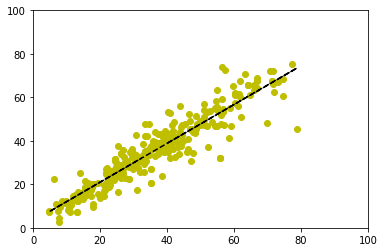

In [84]:
coef = np.polyfit(y_actual,y_predict,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_actual,y_predict, 'yo', y_actual, poly1d_fn(y_actual), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)